# 1. Import All the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

# 2. Get the Data and Understanding

In [2]:
df = pd.read_csv('bill_authentication.csv')

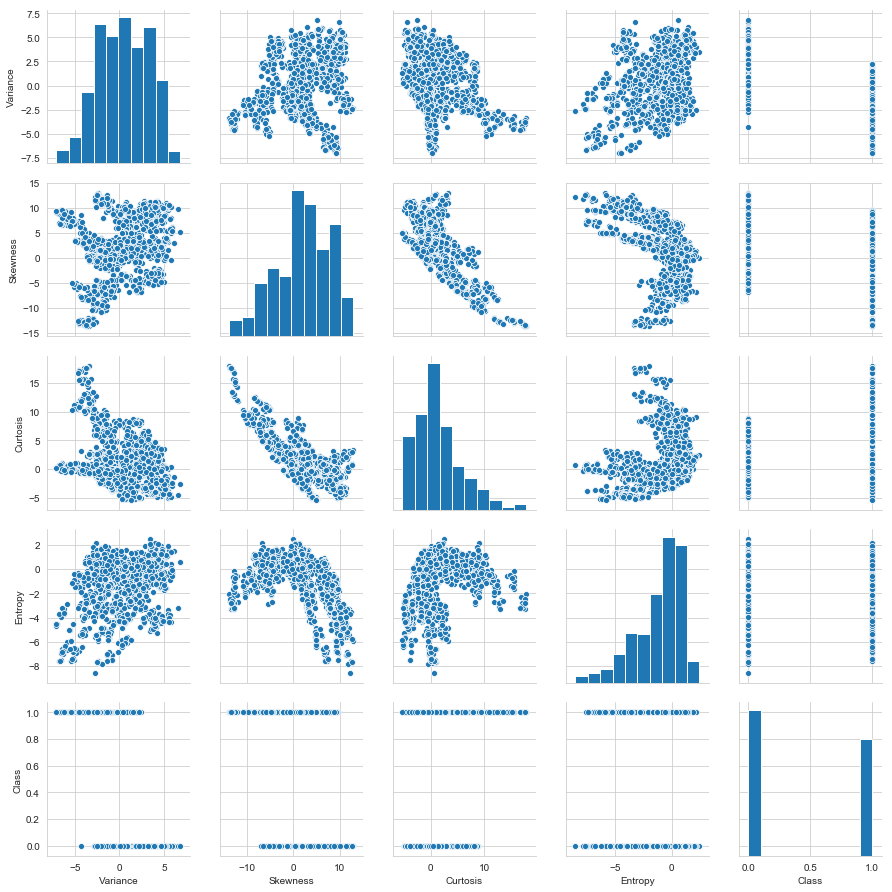

In [3]:
sns.pairplot(df)

In [4]:
df.columns

Index(['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class'], dtype='object')

In [5]:
df.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [6]:
df.groupby('Class').count() # classes are well distributed

,Variance,Skewness,Curtosis,Entropy
Class,,,,
0,762,762,762,762
1,610,610,610,610


# 3. Splitting the Data

In [7]:
X = df.drop('Class', axis=1)
y = df['Class']

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=101)

# 4.SVC Classifier Model Building

 linear kernel

In [9]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(x_train, y_train)
pred_svc = svc.predict(x_test)

from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, pred_svc))
print('\n')
print(classification_report(y_test, pred_svc))

[[314   3]
 [  0 232]]


              precision    recall  f1-score   support

           0       1.00      0.99      1.00       317
           1       0.99      1.00      0.99       232

   micro avg       0.99      0.99      0.99       549
   macro avg       0.99      1.00      0.99       549
weighted avg       0.99      0.99      0.99       549



 'rbf' Kernel

In [10]:
svc2 = SVC()
svc2.fit(x_train, y_train)
pred_svc2 = svc2.predict(x_test)

from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, pred_svc2))
print('\n')
print(classification_report(y_test, pred_svc2))

# We'have achieved 100 percent correct so kets work with other data set.

[[317   0]
 [  0 232]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       317
           1       1.00      1.00      1.00       232

   micro avg       1.00      1.00      1.00       549
   macro avg       1.00      1.00      1.00       549
weighted avg       1.00      1.00      1.00       549



C:\Users\prati\Python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# 5. SVM with Grid Search

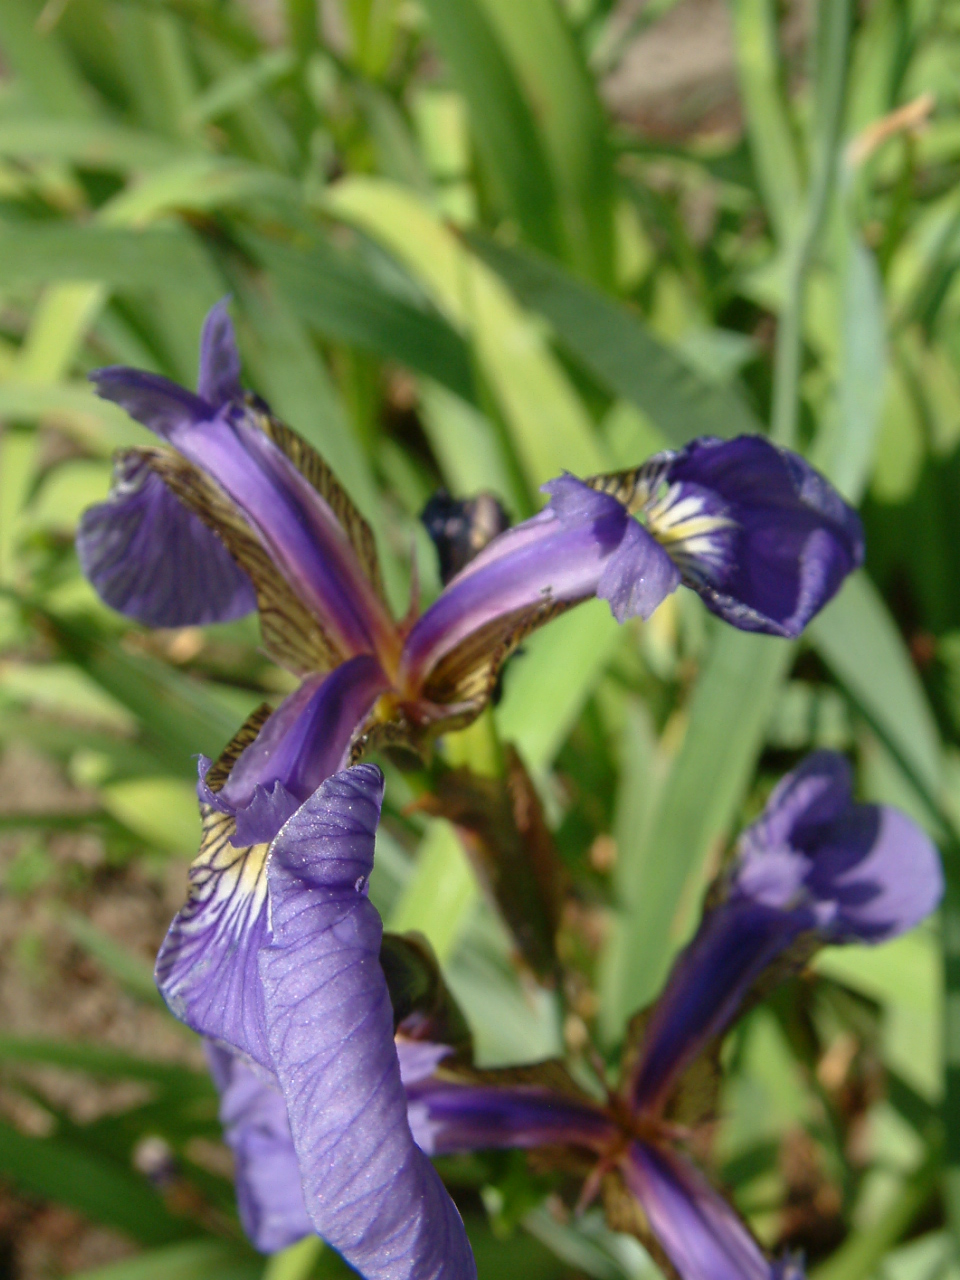

In [11]:
from IPython.display import Image
url = 'http://upload.wikimedia.org/wikipedia/commons/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg'
Image(url,width=200, height=200)

In [12]:
df2 = sns.load_dataset('iris')
df2.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


### EDA

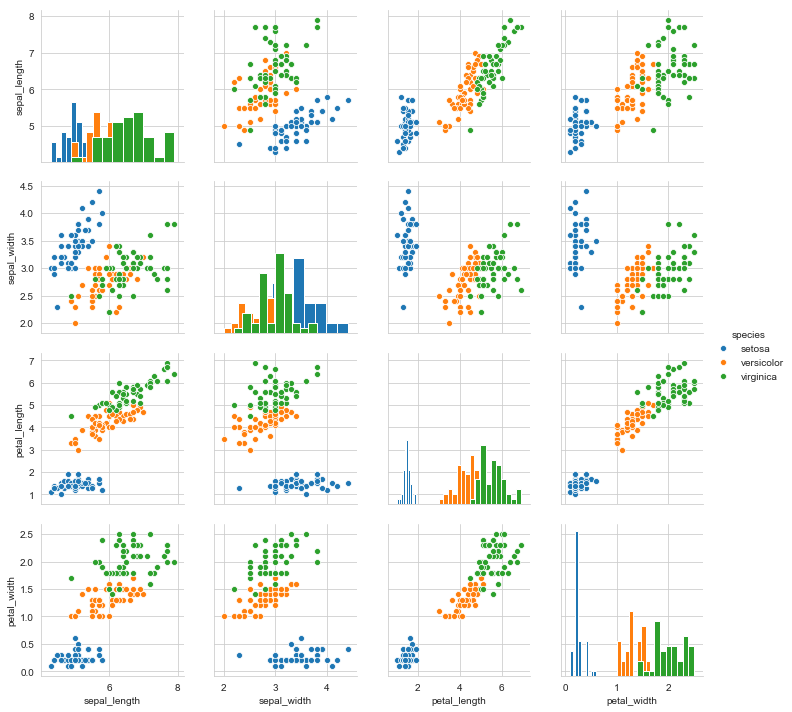

In [13]:
sns.pairplot(df2, hue='species', diag_kind='hist')

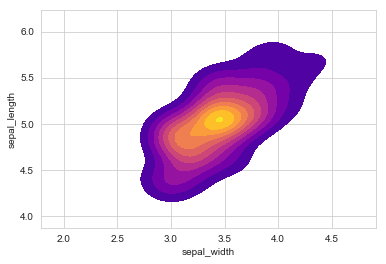

In [14]:
setosa = df2[df2['species']=='setosa']
sns.kdeplot( setosa['sepal_width'], setosa['sepal_length'],
                 cmap="plasma", shade=True, shade_lowest=False)

### split

In [15]:
X = df2.drop('species', axis=1)
y = df2['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

### Grid Search

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

In [18]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished
C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [19]:
prediction = grid.predict(X_test)

In [20]:
print(confusion_matrix(y_test,prediction))

[[19  0  0]
 [ 0 25  1]
 [ 0  0 15]]


In [21]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.96      0.98        26
   virginica       0.94      1.00      0.97        15

   micro avg       0.98      0.98      0.98        60
   macro avg       0.98      0.99      0.98        60
weighted avg       0.98      0.98      0.98        60



In [22]:
grid.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [23]:
grid.best_params_

{'C': 1, 'gamma': 0.1}

# 6. Support Vector Regression SVR

In [24]:
df = pd.read_csv('Ecommerce Customers')

In [25]:
df.head(2)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933


In [26]:
X= df[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']] ## Columns You want in the model
y=df['Yearly Amount Spent'] # Column You want to predict
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.4, random_state = 101)

In [27]:
from sklearn.svm import SVR
svr =  SVR()

In [28]:
svr.fit(x_train, y_train)

C:\Users\prati\Python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [29]:
prediction =  svr.predict(x_test)

In [30]:
from sklearn import metrics

In [31]:
residual = y_test-prediction

(array([ 1.,  0.,  0.,  0.,  1.,  1.,  0.,  3.,  1.,  2.,  4.,  5.,  4.,
         6.,  8., 18., 17., 11., 14., 17., 17., 24., 13.,  8.,  7.,  4.,
         3.,  1.,  2.,  1.,  1.,  0.,  0.,  3.,  1.,  0.,  0.,  0.,  1.,
         1.]),
 array([-227.03666024, -214.89789245, -202.75912465, -190.62035686,
        -178.48158907, -166.34282127, -154.20405348, -142.06528569,
        -129.92651789, -117.7877501 , -105.64898231,  -93.51021451,
         -81.37144672,  -69.23267893,  -57.09391113,  -44.95514334,
         -32.81637555,  -20.67760775,   -8.53883996,    3.59992783,
          15.73869563,   27.87746342,   40.01623121,   52.15499901,
          64.2937668 ,   76.43253459,   88.57130239,  100.71007018,
         112.84883797,  124.98760577,  137.12637356,  149.26514135,
         161.40390915,  173.54267694,  185.68144473,  197.82021252,
         209.95898032,  222.09774811,  234.2365159 ,  246.3752837 ,
         258.51405149]),
 <a list of 40 Patch objects>)

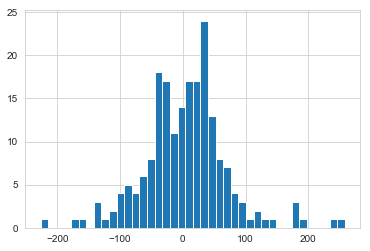

In [32]:
plt.hist(residual, bins =40 )

In [33]:
print(np.sqrt(metrics.mean_squared_error(y_test, prediction)))

67.23489815935433


# 7. lets do from the SVR Grid Search

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
# SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
#     gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
#     tol=0.001, verbose=False)

# SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
#     decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
#     kernel='rbf', max_iter=-1, probability=False, random_state=None,
#     shrinking=True, tol=0.001, verbose=False)

In [36]:
svr_param = {'C':[1,10,50,100,500,1000],'gamma':[1,0.75,0.50,0.10,0.05,0.01,0.001,0.0001],'epsilon':[0.1,0.2,0.3],'kernel'
            :['linear','poly','rbf']}

In [37]:
svrModel = GridSearchCV(SVR(), param_grid=svr_param, verbose = 2)

In [38]:
svrModel.fit(x_train, y_train)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
[CV] C=1, epsilon=0.1, gamma=1, kernel=linear ........................
[CV] ......... C=1, epsilon=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=1, epsilon=0.1, gamma=1, kernel=linear ........................
[CV] ......... C=1, epsilon=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=1, epsilon=0.1, gamma=1, kernel=linear ........................
[CV] ......... C=1, epsilon=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=1, epsilon=0.1, gamma=1, kernel=poly ..........................


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ........... C=1, epsilon=0.1, gamma=1, kernel=poly, total=   5.5s
[CV] C=1, epsilon=0.1, gamma=1, kernel=poly ..........................
[CV] ........... C=1, epsilon=0.1, gamma=1, kernel=poly, total=   4.7s
[CV] C=1, epsilon=0.1, gamma=1, kernel=poly ..........................
[CV] ........... C=1, epsilon=0.1, gamma=1, kernel=poly, total=   4.7s
[CV] C=1, epsilon=0.1, gamma=1, kernel=rbf ...........................
[CV] ............ C=1, epsilon=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, epsilon=0.1, gamma=1, kernel=rbf ...........................
[CV] ............ C=1, epsilon=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, epsilon=0.1, gamma=1, kernel=rbf ...........................
[CV] ............ C=1, epsilon=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, epsilon=0.1, gamma=0.75, kernel=linear .....................
[CV] ...... C=1, epsilon=0.1, gamma=0.75, kernel=linear, total=   0.0s
[CV] C=1, epsilon=0.1, gamma=0.75, kernel=linear .....................
[CV] .

[CV] ....... C=1, epsilon=0.1, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1, epsilon=0.2, gamma=1, kernel=linear ........................
[CV] ......... C=1, epsilon=0.2, gamma=1, kernel=linear, total=   0.0s
[CV] C=1, epsilon=0.2, gamma=1, kernel=linear ........................
[CV] ......... C=1, epsilon=0.2, gamma=1, kernel=linear, total=   0.0s
[CV] C=1, epsilon=0.2, gamma=1, kernel=linear ........................
[CV] ......... C=1, epsilon=0.2, gamma=1, kernel=linear, total=   0.0s
[CV] C=1, epsilon=0.2, gamma=1, kernel=poly ..........................
[CV] ........... C=1, epsilon=0.2, gamma=1, kernel=poly, total=   3.1s
[CV] C=1, epsilon=0.2, gamma=1, kernel=poly ..........................
[CV] ........... C=1, epsilon=0.2, gamma=1, kernel=poly, total=   2.3s
[CV] C=1, epsilon=0.2, gamma=1, kernel=poly ..........................
[CV] ........... C=1, epsilon=0.2, gamma=1, kernel=poly, total=   4.0s
[CV] C=1, epsilon=0.2, gamma=1, kernel=rbf ...........................
[CV] .

[CV] ........... C=1, epsilon=0.3, gamma=1, kernel=poly, total=   3.8s
[CV] C=1, epsilon=0.3, gamma=1, kernel=poly ..........................
[CV] ........... C=1, epsilon=0.3, gamma=1, kernel=poly, total=   2.6s
[CV] C=1, epsilon=0.3, gamma=1, kernel=poly ..........................
[CV] ........... C=1, epsilon=0.3, gamma=1, kernel=poly, total=   2.1s
[CV] C=1, epsilon=0.3, gamma=1, kernel=rbf ...........................
[CV] ............ C=1, epsilon=0.3, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, epsilon=0.3, gamma=1, kernel=rbf ...........................
[CV] ............ C=1, epsilon=0.3, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, epsilon=0.3, gamma=1, kernel=rbf ...........................
[CV] ............ C=1, epsilon=0.3, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, epsilon=0.3, gamma=0.75, kernel=linear .....................
[CV] ...... C=1, epsilon=0.3, gamma=0.75, kernel=linear, total=   0.0s
[CV] C=1, epsilon=0.3, gamma=0.75, kernel=linear .....................
[CV] .

[CV] .......... C=10, epsilon=0.1, gamma=1, kernel=poly, total=   4.9s
[CV] C=10, epsilon=0.1, gamma=1, kernel=poly .........................
[CV] .......... C=10, epsilon=0.1, gamma=1, kernel=poly, total=   1.8s
[CV] C=10, epsilon=0.1, gamma=1, kernel=poly .........................
[CV] .......... C=10, epsilon=0.1, gamma=1, kernel=poly, total=   5.3s
[CV] C=10, epsilon=0.1, gamma=1, kernel=rbf ..........................
[CV] ........... C=10, epsilon=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=10, epsilon=0.1, gamma=1, kernel=rbf ..........................
[CV] ........... C=10, epsilon=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=10, epsilon=0.1, gamma=1, kernel=rbf ..........................
[CV] ........... C=10, epsilon=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=10, epsilon=0.1, gamma=0.75, kernel=linear ....................
[CV] ..... C=10, epsilon=0.1, gamma=0.75, kernel=linear, total=   0.0s
[CV] C=10, epsilon=0.1, gamma=0.75, kernel=linear ....................
[CV] .

[CV] ...... C=10, epsilon=0.1, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=10, epsilon=0.1, gamma=0.0001, kernel=rbf .....................
[CV] ...... C=10, epsilon=0.1, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=10, epsilon=0.2, gamma=1, kernel=linear .......................
[CV] ........ C=10, epsilon=0.2, gamma=1, kernel=linear, total=   0.0s
[CV] C=10, epsilon=0.2, gamma=1, kernel=linear .......................
[CV] ........ C=10, epsilon=0.2, gamma=1, kernel=linear, total=   0.0s
[CV] C=10, epsilon=0.2, gamma=1, kernel=linear .......................
[CV] ........ C=10, epsilon=0.2, gamma=1, kernel=linear, total=   0.0s
[CV] C=10, epsilon=0.2, gamma=1, kernel=poly .........................
[CV] .......... C=10, epsilon=0.2, gamma=1, kernel=poly, total=   3.8s
[CV] C=10, epsilon=0.2, gamma=1, kernel=poly .........................
[CV] .......... C=10, epsilon=0.2, gamma=1, kernel=poly, total=   2.1s
[CV] C=10, epsilon=0.2, gamma=1, kernel=poly .........................
[CV] .

[CV] ... C=10, epsilon=0.2, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=10, epsilon=0.2, gamma=0.0001, kernel=poly ....................
[CV] ..... C=10, epsilon=0.2, gamma=0.0001, kernel=poly, total=   0.0s
[CV] C=10, epsilon=0.2, gamma=0.0001, kernel=poly ....................
[CV] ..... C=10, epsilon=0.2, gamma=0.0001, kernel=poly, total=   0.0s
[CV] C=10, epsilon=0.2, gamma=0.0001, kernel=poly ....................
[CV] ..... C=10, epsilon=0.2, gamma=0.0001, kernel=poly, total=   0.0s
[CV] C=10, epsilon=0.2, gamma=0.0001, kernel=rbf .....................
[CV] ...... C=10, epsilon=0.2, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=10, epsilon=0.2, gamma=0.0001, kernel=rbf .....................
[CV] ...... C=10, epsilon=0.2, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=10, epsilon=0.2, gamma=0.0001, kernel=rbf .....................
[CV] ...... C=10, epsilon=0.2, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=10, epsilon=0.3, gamma=1, kernel=linear .......................
[CV] .

[CV] ....... C=10, epsilon=0.3, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=10, epsilon=0.3, gamma=0.0001, kernel=linear ..................
[CV] ... C=10, epsilon=0.3, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=10, epsilon=0.3, gamma=0.0001, kernel=linear ..................
[CV] ... C=10, epsilon=0.3, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=10, epsilon=0.3, gamma=0.0001, kernel=linear ..................
[CV] ... C=10, epsilon=0.3, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=10, epsilon=0.3, gamma=0.0001, kernel=poly ....................
[CV] ..... C=10, epsilon=0.3, gamma=0.0001, kernel=poly, total=   0.0s
[CV] C=10, epsilon=0.3, gamma=0.0001, kernel=poly ....................
[CV] ..... C=10, epsilon=0.3, gamma=0.0001, kernel=poly, total=   0.0s
[CV] C=10, epsilon=0.3, gamma=0.0001, kernel=poly ....................
[CV] ..... C=10, epsilon=0.3, gamma=0.0001, kernel=poly, total=   0.0s
[CV] C=10, epsilon=0.3, gamma=0.0001, kernel=rbf .....................
[CV] .

[CV] ....... C=50, epsilon=0.1, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=50, epsilon=0.1, gamma=0.01, kernel=poly ......................
[CV] ....... C=50, epsilon=0.1, gamma=0.01, kernel=poly, total=   0.1s
[CV] C=50, epsilon=0.1, gamma=0.01, kernel=rbf .......................
[CV] ........ C=50, epsilon=0.1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=50, epsilon=0.1, gamma=0.01, kernel=rbf .......................
[CV] ........ C=50, epsilon=0.1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=50, epsilon=0.1, gamma=0.01, kernel=rbf .......................
[CV] ........ C=50, epsilon=0.1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=50, epsilon=0.1, gamma=0.001, kernel=linear ...................
[CV] .... C=50, epsilon=0.1, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=50, epsilon=0.1, gamma=0.001, kernel=linear ...................
[CV] .... C=50, epsilon=0.1, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=50, epsilon=0.1, gamma=0.001, kernel=linear ...................
[CV] .

[CV] ....... C=50, epsilon=0.2, gamma=0.05, kernel=poly, total=   1.9s
[CV] C=50, epsilon=0.2, gamma=0.05, kernel=poly ......................
[CV] ....... C=50, epsilon=0.2, gamma=0.05, kernel=poly, total=   2.3s
[CV] C=50, epsilon=0.2, gamma=0.05, kernel=poly ......................
[CV] ....... C=50, epsilon=0.2, gamma=0.05, kernel=poly, total=   1.7s
[CV] C=50, epsilon=0.2, gamma=0.05, kernel=rbf .......................
[CV] ........ C=50, epsilon=0.2, gamma=0.05, kernel=rbf, total=   0.0s
[CV] C=50, epsilon=0.2, gamma=0.05, kernel=rbf .......................
[CV] ........ C=50, epsilon=0.2, gamma=0.05, kernel=rbf, total=   0.0s
[CV] C=50, epsilon=0.2, gamma=0.05, kernel=rbf .......................
[CV] ........ C=50, epsilon=0.2, gamma=0.05, kernel=rbf, total=   0.0s
[CV] C=50, epsilon=0.2, gamma=0.01, kernel=linear ....................
[CV] ..... C=50, epsilon=0.2, gamma=0.01, kernel=linear, total=   0.0s
[CV] C=50, epsilon=0.2, gamma=0.01, kernel=linear ....................
[CV] .

KeyboardInterrupt: 

In [ ]:
svrModel.best_estimator_

In [ ]:
svrModel.best_params_

In [ ]:
prediction_svr = svrModel.predict(x_test)

In [ ]:
residual_svr = y_test-prediction_svr
plt.hist(residual_svr, bins =40 )

In [ ]:
print(np.sqrt(metrics.mean_squared_error(y_test, prediction_svr)))